<center><h1>ISE 537 Financial Analytics Final Project</h1></center>
<br>
<center> <font size="4">Name:Chung Ming Wu</font></center>

<center> USC_ID:7703568593</center>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams.update({'font.size': 15})
# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
import yfinance as yf
import math
from keras.callbacks import History 
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Get AAPL and GOOG stock from yfinance

In [2]:
# The tech stocks we'll use for this analysis from yfinance
AAPL = yf.download('AAPL', start='2020-01-01', end='2022-11-01')
GOOG = yf.download('GOOG', start='2020-01-01', end='2022-11-01')
DJI = yf.download('^DJI', start='2020-01-01', end='2022-11-01')
NASDAQ = yf.download('^IXIC', start='2020-01-01', end='2022-11-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## AAPL and GOOG stock trend

In [3]:
AAPL_dataset = AAPL['Close']
GOOG_dataset = GOOG['Close']

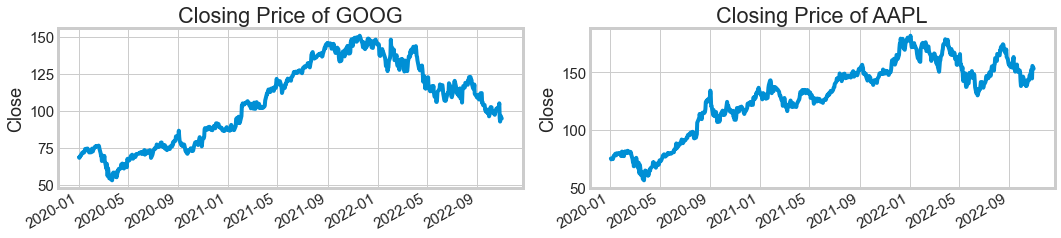

In [4]:
company_list = [GOOG, AAPL]
tech_list = ['GOOG', 'AAPL']

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

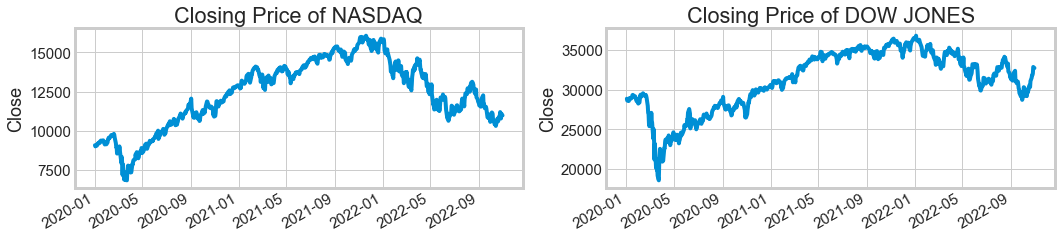

In [5]:
company_list = [NASDAQ, DJI]
tech_list = ['NASDAQ', 'DOW JONES']

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

### LSTM Data Processing 

In [6]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(AAPL) * .9 ))
training_data_len

643

In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
AAPL_dataset = np.asarray(AAPL_dataset)
AAPL_dataset_1 = AAPL_dataset.reshape(-1,1)
AAPL_scaled_data = scaler.fit_transform(AAPL_dataset_1)

### Train Test Split on AAPL

In [8]:
# Create the training data set 
# Create the scaled training data set
train_data = AAPL_scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.15085277, 0.14505529, 0.14976075, 0.14696135, 0.15649137,
       0.16927753, 0.17066729, 0.18383068, 0.17533306, 0.17267259,
       0.18041574, 0.18734493, 0.1830564 , 0.18529994, 0.18833764,
       0.18651102, 0.16792745, 0.18528007, 0.19848314, 0.19754999,
       0.16903929, 0.16735166, 0.18758317, 0.19274529, 0.20021045,
       0.18992596, 0.19294378, 0.18909205, 0.2041615 , 0.19953542])]
[0.19969428495361619]
[array([0.15085277, 0.14505529, 0.14976075, 0.14696135, 0.15649137,
       0.16927753, 0.17066729, 0.18383068, 0.17533306, 0.17267259,
       0.18041574, 0.18734493, 0.1830564 , 0.18529994, 0.18833764,
       0.18651102, 0.16792745, 0.18528007, 0.19848314, 0.19754999,
       0.16903929, 0.16735166, 0.18758317, 0.19274529, 0.20021045,
       0.18992596, 0.19294378, 0.18909205, 0.2041615 , 0.19953542]), array([0.14505529, 0.14976075, 0.14696135, 0.15649137, 0.16927753,
       0.17066729, 0.18383068, 0.17533306, 0.17267259, 0.18041574,
       0.18734493, 0.1830564 , 0.1

### LSTM Model Selection AAPL

In [9]:
# Build the LSTM model 
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary() 
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(x_train, y_train, batch_size=256, epochs=100, verbose=2, validation_split=0.33)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 - 4s - loss: 0.2396 - val_loss: 0.1732 - 4s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 0.0402 - val_loss: 0.0298 - 225ms/epoch - 113ms/step
Epoch 3/100
2/2 - 0s - l

### LSTM Convergent AAPL

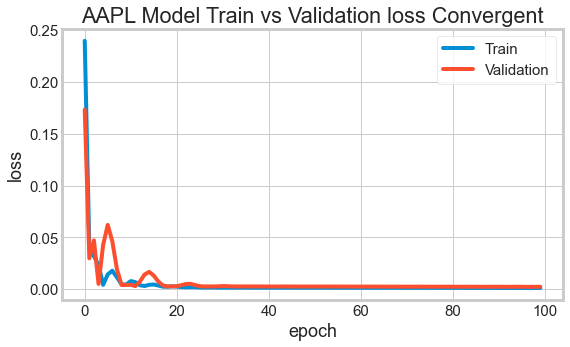

In [10]:
pyplot.figure(figsize=(8,5))
pyplot.plot(model.history.history['loss'])
pyplot.plot(model.history.history['val_loss'])
pyplot.title('AAPL Model Train vs Validation loss Convergent')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['Train', 'Validation'], loc='upper right')
pyplot.show()

### RMSE of the training dataset of AAPL


In [11]:
# Get the models predicted price values 
x_predictions = model.predict(x_train)
x_predictions = scaler.inverse_transform(x_predictions)
y_train = AAPL_dataset_1[30:training_data_len, :]

# Get the root mean squared error (RMSE)
train_rmse = np.sqrt(np.mean(((x_predictions - y_train) ** 2)))
train_rmse

4.97261208480197

### RMSE of the testing dataset of AAPL


In [12]:
# Create the testing data set
test_data = AAPL_scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = AAPL_dataset_1[training_data_len:, :]

for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
test_predictions = model.predict(x_test)
test_predictions = scaler.inverse_transform(test_predictions)

# Get the root mean squared error (RMSE)
test_rmse = np.sqrt(np.mean(((test_predictions - y_test) ** 2)))
test_rmse

5.7429146690384965

### Plot the true and the predicted price sequences of AAPL

In [13]:
data = AAPL.iloc[:,3:4]
train = data[30:int(training_data_len)]
test = data.iloc[training_data_len:,:]

In [14]:
train['Predictions']  = x_predictions
test['Predictions']  = test_predictions
final_AAPL = pd.concat([train, test], axis=0)

<ipython-input-14-0fedf7cc2766>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Predictions']  = x_predictions
<ipython-input-14-0fedf7cc2766>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']  = test_predictions


In [15]:
# Visualize the data
def plot_overall(final):
    plt.figure(figsize=(20,10))
    plt.title('LSTM Model')
    plt.xlabel('Datetime', fontsize=18)
    plt.ylabel('Price USD ($)', fontsize=18)
    plt.plot(final.index,final['Close'],color = 'b', label="Price")  
    plt.plot(final.index,final['Predictions'],color = 'r', label="Prediction")
    plt.legend(['Price', 'Predictions'], loc='lower left')
    plt.show()

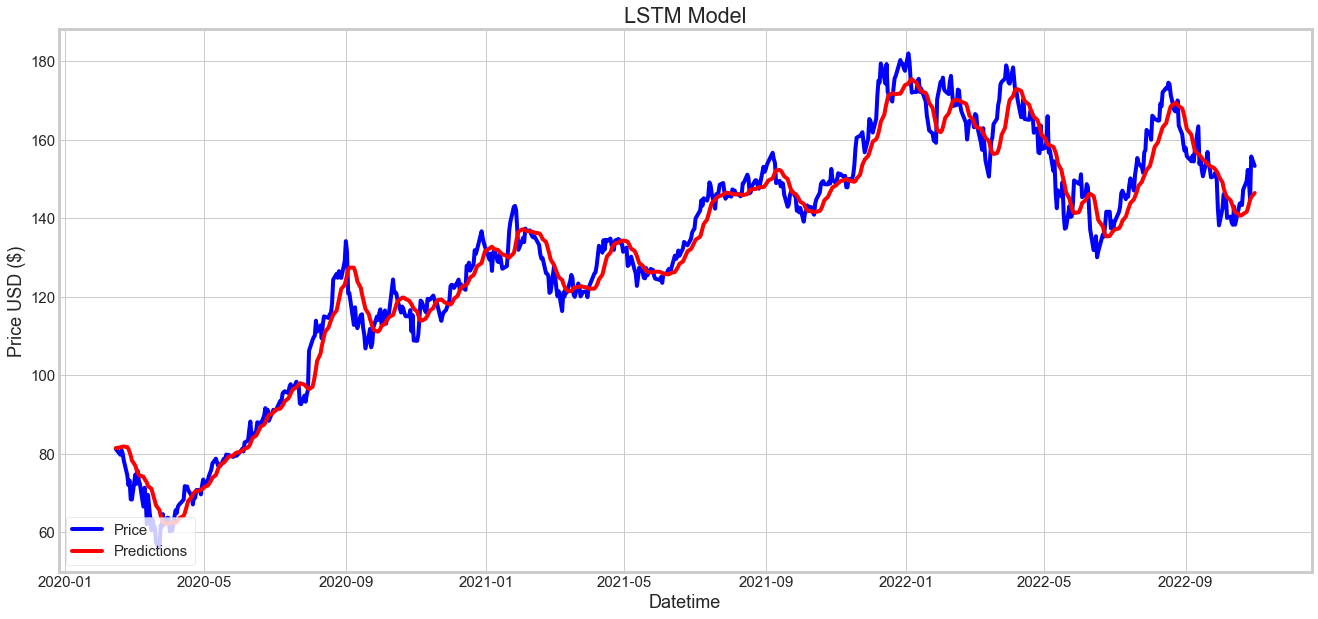

In [16]:
plot_overall(final_AAPL)

### Scale data on GOOG

In [17]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
GOOG_dataset = np.asarray(GOOG_dataset)
GOOG_dataset_1 = GOOG_dataset.reshape(-1,1)
GOOG_scaled_data = scaler.fit_transform(GOOG_dataset_1)

### Train Test Split on GOOG

In [18]:
# Create the training data set 
# Create the scaled training data set
train_data_GOOG = GOOG_scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train_GOOG = []
y_train_GOOG = []

for i in range(30, len(train_data_GOOG)):
    x_train_GOOG.append(train_data_GOOG[i-30:i, 0])
    y_train_GOOG.append(train_data_GOOG[i, 0])
    if i<= 31:
        print(x_train_GOOG)
        print(y_train_GOOG)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train_GOOG, y_train_GOOG = np.array(x_train_GOOG), np.array(y_train_GOOG)

# Reshape the data
x_train_GOOG = np.reshape(x_train_GOOG, (x_train_GOOG.shape[0], x_train_GOOG.shape[1], 1))
# x_train.shape

[array([0.15874352, 0.15531576, 0.1724545 , 0.17201004, 0.1776191 ,
       0.1855422 , 0.19059955, 0.19545251, 0.19118696, 0.19543716,
       0.20182266, 0.21647868, 0.21852715, 0.21931894, 0.21967649,
       0.2094904 , 0.19272971, 0.20226197, 0.20536282, 0.20393754,
       0.19289831, 0.2193138 , 0.19945748, 0.20005004, 0.21435358,
       0.21588611, 0.23093031, 0.23098651, 0.23582927, 0.23398517])]
[0.23709108964682934]

[array([0.15874352, 0.15531576, 0.1724545 , 0.17201004, 0.1776191 ,
       0.1855422 , 0.19059955, 0.19545251, 0.19118696, 0.19543716,
       0.20182266, 0.21647868, 0.21852715, 0.21931894, 0.21967649,
       0.2094904 , 0.19272971, 0.20226197, 0.20536282, 0.20393754,
       0.19289831, 0.2193138 , 0.19945748, 0.20005004, 0.21435358,
       0.21588611, 0.23093031, 0.23098651, 0.23582927, 0.23398517]), array([0.15531576, 0.1724545 , 0.17201004, 0.1776191 , 0.1855422 ,
       0.19059955, 0.19545251, 0.19118696, 0.19543716, 0.20182266,
       0.21647868, 0.21852715, 0.

In [19]:
# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(100, return_sequences=True, input_shape=(x_train_GOOG.shape[1], 1)))
model2.add(LSTM(100, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))
model2.summary() 
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model2.fit(x_train_GOOG, y_train_GOOG, batch_size=256, epochs=100, verbose=2, validation_split=0.33)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 - 3s - loss: 0.2031 - val_loss: 0.1789 - 3s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.0444 - val_loss: 0.0233 - 165ms/epoch - 82ms/step
Epoch 3/100
2/2 - 0s - 

### LSTM Convergent GOOG

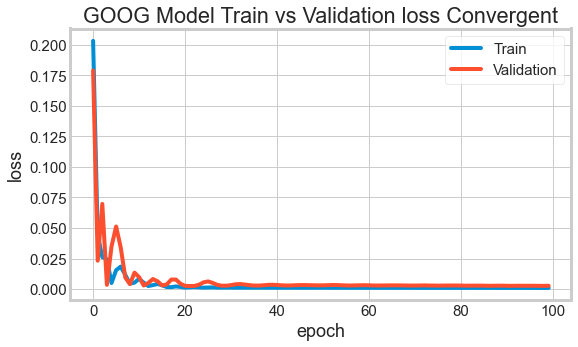

In [20]:
pyplot.figure(figsize=(8,5))
pyplot.plot(model2.history.history['loss'])
pyplot.plot(model2.history.history['val_loss'])
pyplot.title('GOOG Model Train vs Validation loss Convergent')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['Train', 'Validation'], loc='upper right')
pyplot.show()

### RMSE of the training dataset of GOOG


In [21]:
# Get the models predicted price values 
x_predictions_GOOG = model2.predict(x_train_GOOG)
x_predictions_GOOG = scaler.inverse_transform(x_predictions_GOOG)
y_train_GOOG = GOOG_dataset_1[30:training_data_len, :]

# Get the root mean squared error (RMSE)
train_rmse_GOOG = np.sqrt(np.mean(((x_predictions_GOOG - y_train_GOOG) ** 2)))
train_rmse_GOOG

3.8669989100786273

### RMSE of the testing dataset of GOOG


In [22]:
# Create the testing data set
test_data_GOOG = GOOG_scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test_GOOG = []
y_test_GOOG = GOOG_dataset_1[training_data_len:, :]

for i in range(30, len(test_data_GOOG)):
    x_test_GOOG.append(test_data_GOOG[i-30:i, 0])
    
# Convert the data to a numpy array
x_test_GOOG = np.array(x_test_GOOG)

# Reshape the data
x_test_GOOG = np.reshape(x_test_GOOG, (x_test_GOOG.shape[0], x_test_GOOG.shape[1], 1 ))

# Get the models predicted price values 
test_predictions_GOOG = model.predict(x_test_GOOG)
test_predictions_GOOG = scaler.inverse_transform(test_predictions_GOOG)

# Get the root mean squared error (RMSE)
test_rmse_GOOG = np.sqrt(np.mean(((test_predictions_GOOG - y_test_GOOG) ** 2)))
test_rmse_GOOG

4.243011178773084

### Plot the true and the predicted price sequences of GOOG

In [23]:
data = GOOG.iloc[:,3:4]
train_GOOG = data[30:int(training_data_len)]
test_GOOG = data.iloc[training_data_len:,:]

In [24]:
train_GOOG['Predictions']  = x_predictions_GOOG
test_GOOG['Predictions']  = test_predictions_GOOG
final_GOOG = pd.concat([train_GOOG, test_GOOG], axis=0)

<ipython-input-24-e837371d72a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_GOOG['Predictions']  = x_predictions_GOOG
<ipython-input-24-e837371d72a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_GOOG['Predictions']  = test_predictions_GOOG


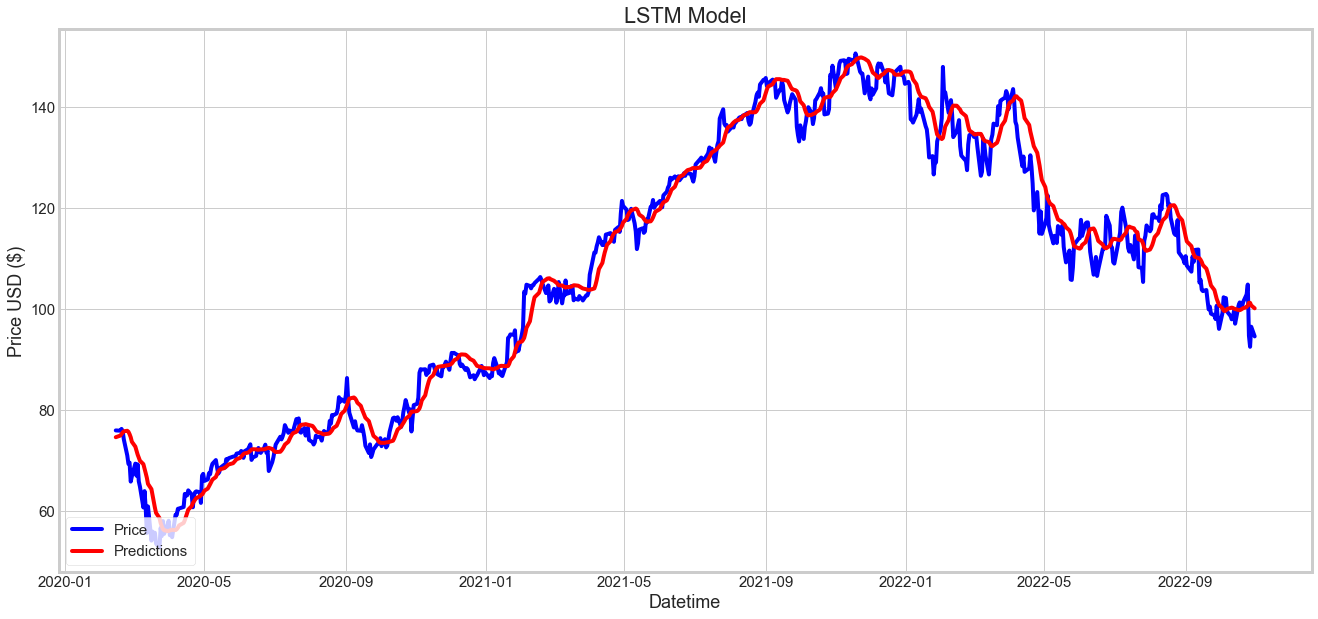

In [25]:
plot_overall(final_GOOG)

## ARIMA

In [26]:
# import library for ARIMA
import pmdarima as pmd
import pandas_datareader as pd_data
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import scipy as sp
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
plt.rcParams.update({'font.size': 15})
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [27]:
def plot_diagnosticsTight2(data, rtn, title1 = 'Apple'):

    fig, axes = plt.subplots(1,2,figsize=(15,5))
    axes[0].set_ylabel('ACF', fontsize=15)
    axes[0].set_xlabel('Lag', fontsize=15)
    fig = plot_acf(data,lags=25,zero=True, ax = axes[0], title= 'ACF '+ title1, use_vlines = True)
    axes[1].set_ylabel('ACF', fontsize=15)
    axes[1].set_xlabel('Lag', fontsize=15)
    fig = plot_acf(rtn,lags=25,zero=True, ax = axes[1], title= 'ACF Log Returns '+ title1, use_vlines = True)

In [28]:
df_rtn = np.log(AAPL['Close']).diff().dropna()

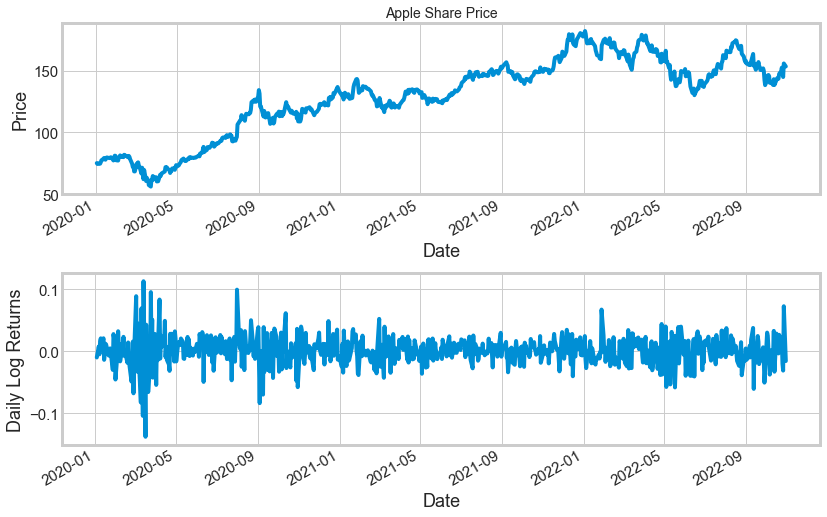

In [29]:
plt.figure(figsize=(12,8))

plt.subplot(2,1, 1)
plt.grid()
AAPL['Close'].plot()
plt.ylabel("Price")
plt.title("Apple Share Price", fontsize = 14)

plt.subplot(2,1, 2)
plt.grid()
plt.tight_layout(pad=1.5)
df_rtn.plot()
plt.ylabel("Daily Log Returns")
plt.savefig("Apple_stationary")

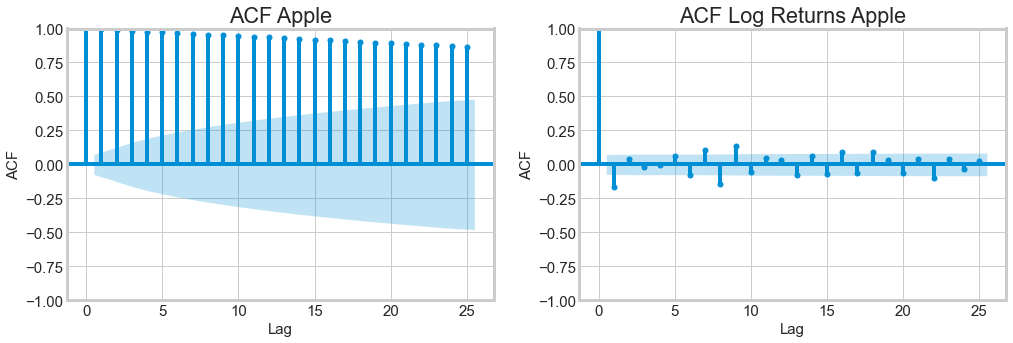

In [30]:
plot_diagnosticsTight2(AAPL['Close'], df_rtn)

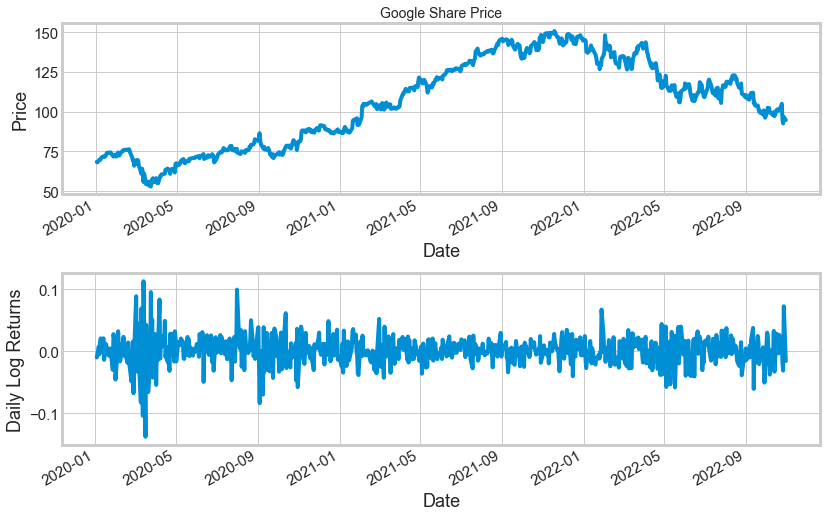

In [31]:
df_GOOG_rtn = np.log(GOOG['Close']).diff().dropna()
plt.figure(figsize=(12,8))

plt.subplot(2,1, 1)
plt.grid()
GOOG['Close'].plot()
plt.ylabel("Price")
plt.title("Google Share Price", fontsize = 14)

plt.subplot(2,1, 2)
plt.grid()
plt.tight_layout(pad=1.5)
df_rtn.plot()
plt.ylabel("Daily Log Returns")
plt.savefig("Google_stationary")

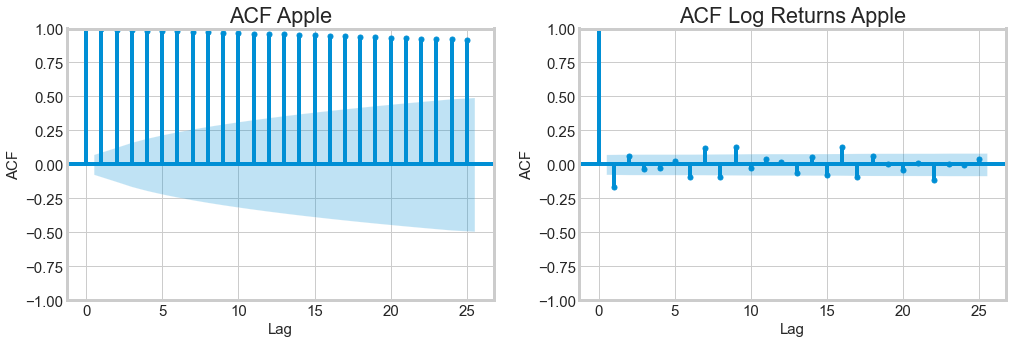

In [32]:
plot_diagnosticsTight2(GOOG['Close'], df_GOOG_rtn)

In [33]:
def plot_diagnosticsTight3(data):

    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,6))
    
    ax1.hist(data, bins =40,color='m', density = True)  
    mu = data.mean()
    sigma = data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
    ax1.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
    ax1.grid()
    ax1.set_title("Hist Resid")
    
    ax2.plot(data)
    ax2.grid()
    ax2.set_title("Resid")
    
    fig = plot_acf(data,lags=40,zero=False, ax = ax3,use_vlines = True)
    ax3.grid()
    
    fig = sm.qqplot(data, line='q', ax = ax4)
    ax4.grid()
    
   
    plt.tight_layout()

## AAPL ARIMA

In [34]:
AAPL_pr = np.array(AAPL.reset_index()['Close'])
AAPL_pr_diff = AAPL_pr[1:] - AAPL_pr[:-1]
AAPL_pr_log = np.log(AAPL_pr)
AAPL_pr_log_diff = AAPL_pr_log[1:] - AAPL_pr_log[:-1]

In [35]:
def getadf(data):
    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [36]:
getadf(AAPL_pr)

ADF Statistic: -1.676275
p-value: 0.443376
	1%: -3.440
	5%: -2.866
	10%: -2.569


The test statistic is bigger than critical values, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).

In [37]:
getadf(AAPL_pr_diff)

ADF Statistic: -28.763337
p-value: 0.000000
	1%: -3.440
	5%: -2.866
	10%: -2.569


Comparing the test statistic to the critical values, it looks like we would have to reject the null hypothesis that the time series is stationary

## Take Log

Let’s log transform the dataset again to make the distribution of values more linear and better meet the expectations of this statistical test.

In [38]:
getadf(AAPL_pr_log)

ADF Statistic: -1.644889
p-value: 0.459707
	1%: -3.440
	5%: -2.866
	10%: -2.569


Running the example shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

In [39]:
getadf(AAPL_pr_log_diff)

ADF Statistic: -8.479755
p-value: 0.000000
	1%: -3.440
	5%: -2.866
	10%: -2.569


The series can be differenced using the diff() function. The p-value now is below the significance level, indicating that the series is stationary

## ARIMA Model  p, q choose

In [40]:
# Separate Train test data 
AAPL_pr_diff_train_data = AAPL_pr_diff[0:training_data_len]
AAPL_pr_diff_test_data  = AAPL_pr_diff[training_data_len:]

In [41]:
def arimamodel_aic(timeseriesarray):
    
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p = 0, 
                              start_q = 0,
                              m = 1,
                              max_p   = 8,
                              max_q   = 8,
                              stepwise = False,
                              trace=True,    
                              max_order = 10,
                              seasonal = False,
                              information_criterion = 'aic'                              
#                               error_action ='ignore',
#                               suppress_warnings = True,
#                               stationary = True,
#                               seasonal = False, 
                             )
    return autoarima_model

In [42]:
def arimamodel_bic(timeseriesarray):
    
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p = 0, 
                              start_q = 0,
                              m = 1,
                              max_p   = 8,
                              max_q   = 8,
                              stepwise = False,
                              trace=True,    
                              max_order = 10,
                              seasonal = False,
                              information_criterion = 'bic'                              
#                               error_action ='ignore',
#                               suppress_warnings = True,
#                               stationary = True,
#                               seasonal = False, 
                             )
    return autoarima_model

In [43]:
AAPL_aic = arimamodel_aic(AAPL_pr_diff_train_data)
AAPL_aic.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3090.169, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3089.414, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3091.381, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=3092.933, Time=0.04 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=3093.510, Time=0.05 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=3095.507, Time=0.06 sec
 ARIMA(0,0,6)(0,0,0)[0]             : AIC=3096.067, Time=0.08 sec
 ARIMA(0,0,7)(0,0,0)[0]             : AIC=3096.436, Time=0.09 sec
 ARIMA(0,0,8)(0,0,0)[0]             : AIC=3094.288, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3089.458, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3091.352, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3093.342, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3093.903, Time=0.13 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=3094.603, Time=0.14 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=3092.518, Time=0.21 sec
 ARIMA(1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  643
Model:               SARIMAX(5, 0, 2)   Log Likelihood               -1535.167
Date:                Thu, 08 Dec 2022   AIC                           3086.335
Time:                        18:22:05   BIC                           3122.064
Sample:                             0   HQIC                          3100.200
                                - 643                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6526      0.126    -13.065      0.000      -1.901      -1.405
ar.L2         -0.8581      0.141     -6.094      0.000      -1.134      -0.582
ar.L3         -0.0935      0.073     -1.273      0.203      -0.238       0.050
ar.L4         -0.0245      0.072     -0.338      0.735      -0.166       0.117
ar.L5          0.0410      0.044      0.940      0.347      -0.044       0.127
ma.L1          1.6076      0.123     13.036      0.000       1.366       1.849
ma.L2          0.7632      0.116      6.569      0.000       0.535       0.991
sigma2         6.9367      0.313     22.193      0.000       6.324       7.549
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                42.68
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                            -0.19
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
AAPL_bic = arimamodel_bic(AAPL_pr_diff_train_data)
AAPL_bic.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : BIC=3094.635, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=3098.347, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : BIC=3104.780, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : BIC=3110.797, Time=0.04 sec
 ARIMA(0,0,4)(0,0,0)[0]             : BIC=3115.840, Time=0.05 sec
 ARIMA(0,0,5)(0,0,0)[0]             : BIC=3122.304, Time=0.06 sec
 ARIMA(0,0,6)(0,0,0)[0]             : BIC=3127.330, Time=0.08 sec
 ARIMA(0,0,7)(0,0,0)[0]             : BIC=3132.165, Time=0.09 sec
 ARIMA(0,0,8)(0,0,0)[0]             : BIC=3134.484, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=3098.390, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=3104.751, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : BIC=3111.207, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : BIC=3116.234, Time=0.13 sec
 ARIMA(1,0,4)(0,0,0)[0]             : BIC=3121.400, Time=0.14 sec
 ARIMA(1,0,5)(0,0,0)[0]             : BIC=3123.781, Time=0.21 sec
 ARIMA(1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  643
Model:                        SARIMAX   Log Likelihood               -1544.085
Date:                Thu, 08 Dec 2022   AIC                           3090.169
Time:                        18:22:26   BIC                           3094.635
Sample:                             0   HQIC                          3091.902
                                - 643                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.1340      0.310     23.040      0.000       6.527       7.741
===================================================================================
Ljung-Box (L1) (Q):                   2.92   Jarque-Bera (JB):                51.68
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.18
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
# Fit the train model
model_ARMA_AAPL = ARIMA(AAPL_pr_diff_train_data, order=(5,0,2))
ARMA_AAPL = model_ARMA_AAPL.fit()
print(ARMA_AAPL.summary())

C:\Users\andy2\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\andy2\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  643
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -1534.362
Date:                Thu, 08 Dec 2022   AIC                           3086.725
Time:                        18:22:27   BIC                           3126.920
Sample:                             0   HQIC                          3102.323
                                - 643                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1232      0.101      1.224      0.221      -0.074       0.320
ar.L1         -1.6593      0.126    -13.137      0.000      -1.907      -1.412
ar.L2         -0.8679      0.141     -6.161      0.0

According to the model summary, the model meets the condition of independence in the residuals (no correlation) because the p-value of the Ljung-Box test (Prob(Q)) is greater than 0.05, so we cannot reject the null hypothesis of independence, but we cannot say that the residual distribution is homoscedastic (constant variance) because the p-value of the Heteroskedasticity test (Prob(H)) is smaller than 0.05.

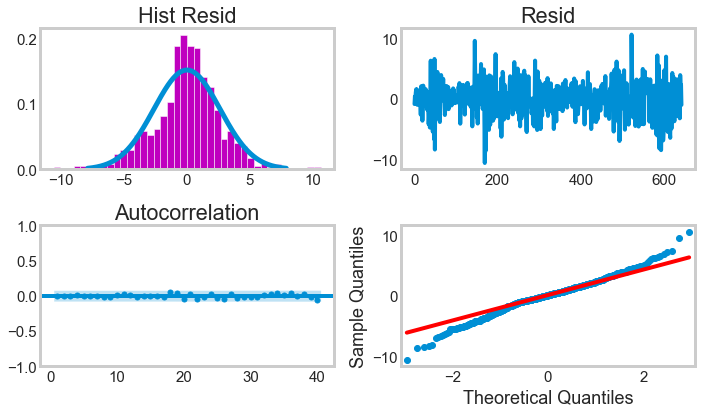

In [46]:
resid_AAPL = ARMA_AAPL.resid
plot_diagnosticsTight3(resid_AAPL)

In [47]:
AAPL_pr_diff_train_data.shape

(643,)

In [48]:
AAPL_pr_diff_test_data.shape 

(70,)

In [49]:
# predcit on the train set
prediction = ARMA_AAPL.predict(n_periods=70, return_conf_int=True)

train_AAPL_ARIMA = pd.DataFrame(AAPL['Close'][:training_data_len])
train_AAPL_ARIMA['predict_diff'] = prediction
train_AAPL_ARIMA['predict_price'] = train_AAPL_ARIMA['Close'] + train_AAPL_ARIMA['predict_diff']
train_AAPL_ARIMA['predict_price'] = train_AAPL_ARIMA['predict_price'].shift(1)
train_AAPL_ARIMA = train_AAPL_ARIMA.dropna()

In [50]:
# RMSE of Train Set
rmse = math.sqrt(mean_squared_error(train_AAPL_ARIMA['Close'], train_AAPL_ARIMA['predict_price']))
print('RMSE Train Set is',round(rmse,3))

RMSE Train Set is 2.632


In [51]:
# predcit on the test set
fc = ARMA_AAPL.forecast(70 , alpha = 0.05)

test_AAPL_ARIMA = pd.DataFrame(AAPL['Close'][training_data_len:])[:-1]
test_AAPL_ARIMA['predict_diff'] = fc
test_AAPL_ARIMA['predict_price'] = test_AAPL_ARIMA['Close'] + test_AAPL_ARIMA['predict_diff']
test_AAPL_ARIMA['predict_price'] = test_AAPL_ARIMA['predict_price'].shift(1)
test_AAPL_ARIMA = test_AAPL_ARIMA.dropna()

In [52]:
# RMSE of Test Set
rmse = math.sqrt(mean_squared_error(test_AAPL_ARIMA['Close'], test_AAPL_ARIMA['predict_price']))
print('RMSE Test Set  is',round(rmse,3))

RMSE Test Set  is 3.395


In [53]:
final_AAPL_ARIMA = pd.concat([train_AAPL_ARIMA, test_AAPL_ARIMA], axis=0)

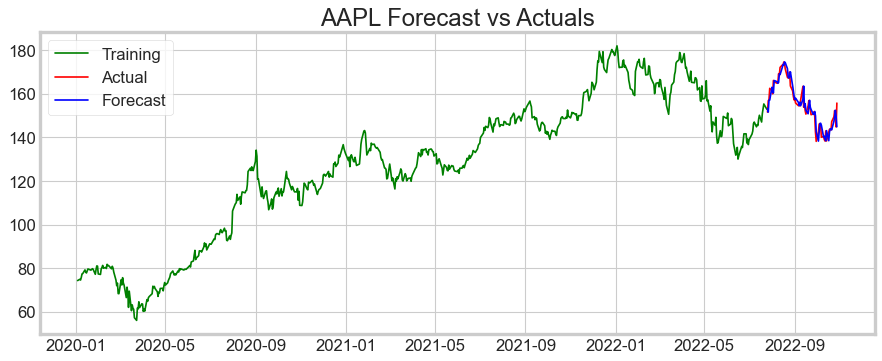

In [54]:
# Plot
plt.figure(figsize=(12,5), dpi=80)
plt.plot(final_AAPL_ARIMA['Close'][0:training_data_len], label='Training',color="green", linewidth=1.5)
plt.plot(final_AAPL_ARIMA['Close'][training_data_len:], label='Actual', color="red",linewidth=1.5)
plt.plot(final_AAPL_ARIMA['predict_price'][training_data_len:], label='Forecast', color="blue",linewidth=1.5)
plt.title('AAPL Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=15)
plt.show()

## Let's then work with the log(price) difference on AAPL 

In [55]:
# Separate Train test data 
AAPL_pr_log_diff_train_data = AAPL_pr_log_diff[0:training_data_len]
AAPL_pr_log_diff_test_data  = AAPL_pr_log_diff[training_data_len:]

In [56]:
AAPL_log_aic= arimamodel_aic(AAPL_pr_log_diff_train_data)
AAPL_log_aic.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3007.838, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3022.464, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-3022.122, Time=0.14 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-3020.327, Time=0.07 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-3018.823, Time=0.17 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=-3016.829, Time=0.24 sec
 ARIMA(0,0,6)(0,0,0)[0]             : AIC=-3017.417, Time=0.34 sec
 ARIMA(0,0,7)(0,0,0)[0]             : AIC=-3018.957, Time=0.51 sec
 ARIMA(0,0,8)(0,0,0)[0]             : AIC=-3024.716, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3023.838, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3022.374, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3020.377, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-3018.375, Time=0.22 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-3016.787, Time=0.21 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=-3025.162, Time=0.42

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  643
Model:               SARIMAX(2, 0, 5)   Log Likelihood                1529.370
Date:                Thu, 08 Dec 2022   AIC                          -3042.741
Time:                        18:22:49   BIC                          -3007.012
Sample:                             0   HQIC                         -3028.876
                                - 643                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7009      0.058    -29.277      0.000      -1.815      -1.587
ar.L2         -0.8698      0.054    -16.018      0.000      -0.976      -0.763
ma.L1          1.5804      0.069     23.011      0.000       1.446       1.715
ma.L2          0.6815      0.078      8.701      0.000       0.528       0.835
ma.L3         -0.0777      0.062     -1.253      0.210      -0.199       0.044
ma.L4          0.0286      0.064      0.448      0.654      -0.097       0.154
ma.L5          0.0644      0.035      1.831      0.067      -0.005       0.133
sigma2         0.0005   2.02e-05     24.851      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               225.86
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
AAPL_log_bic= arimamodel_bic(AAPL_pr_log_diff_train_data)
AAPL_log_bic.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-3003.372, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=-3013.532, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : BIC=-3008.723, Time=0.14 sec
 ARIMA(0,0,3)(0,0,0)[0]             : BIC=-3002.463, Time=0.07 sec
 ARIMA(0,0,4)(0,0,0)[0]             : BIC=-2996.492, Time=0.17 sec
 ARIMA(0,0,5)(0,0,0)[0]             : BIC=-2990.032, Time=0.25 sec
 ARIMA(0,0,6)(0,0,0)[0]             : BIC=-2986.154, Time=0.34 sec
 ARIMA(0,0,7)(0,0,0)[0]             : BIC=-2983.228, Time=0.51 sec
 ARIMA(0,0,8)(0,0,0)[0]             : BIC=-2984.520, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=-3014.905, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=-3008.976, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : BIC=-3002.512, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : BIC=-2996.045, Time=0.22 sec
 ARIMA(1,0,4)(0,0,0)[0]             : BIC=-2989.990, Time=0.20 sec
 ARIMA(1,0,5)(0,0,0)[0]             : BIC=-2993.899, Time=0.42

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  643
Model:               SARIMAX(1, 0, 0)   Log Likelihood                1513.919
Date:                Thu, 08 Dec 2022   AIC                          -3023.838
Time:                        18:23:10   BIC                          -3014.905
Sample:                             0   HQIC                         -3020.371
                                - 643                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1663      0.025     -6.594      0.000      -0.216      -0.117
sigma2         0.0005   1.83e-05     28.826      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               383.04
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
model_ARMA_AAPL_log = ARIMA(AAPL_pr_log_diff_train_data, order=(2,0,5))
ARMA_AAPL_log = model_ARMA_AAPL_log.fit()
print(ARMA_AAPL_log.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  643
Model:                 ARIMA(2, 0, 5)   Log Likelihood                1529.515
Date:                Thu, 08 Dec 2022   AIC                          -3041.029
Time:                        18:23:11   BIC                          -3000.834
Sample:                             0   HQIC                         -3025.431
                                - 643                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.001      1.441      0.150      -0.000       0.003
ar.L1         -1.6442      0.077    -21.455      0.000      -1.794      -1.494
ar.L2         -0.8135      0.071    -11.448      0.0

C:\Users\andy2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


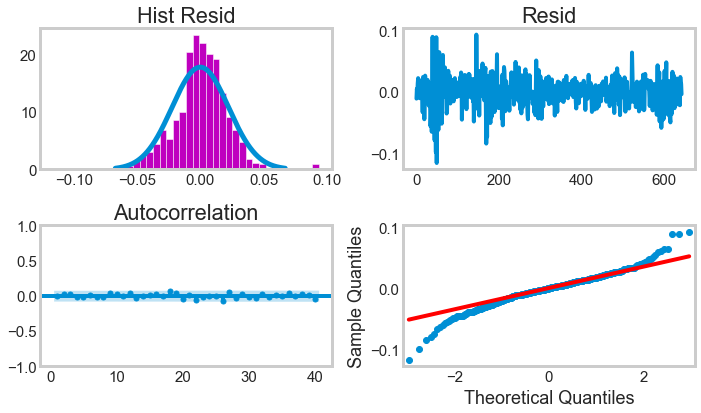

In [59]:
resid_AAPL_log = ARMA_AAPL_log.resid
plot_diagnosticsTight3(resid_AAPL_log)

In [60]:
AAPL_pr_log_diff_train_data.shape

(643,)

In [61]:
AAPL_pr_log_diff_test_data.shape 

(70,)

In [62]:
# predcit on the train set
prediction_AAPL_log = ARMA_AAPL_log.predict(n_periods=70, return_conf_int=True)

# RMSE of Train Set
rmse = math.sqrt(mean_squared_error(AAPL_pr_log_diff_train_data, prediction_AAPL_log))
print('AAPL Log RMSE Train Set is',round(rmse,3))

AAPL Log RMSE Train Set is 0.022


In [63]:
# predcit on the test set
fc_AAPL_log = ARMA_AAPL_log.forecast(70 , alpha = 0.05)

# RMSE of Test Set
rmse = math.sqrt(mean_squared_error(AAPL_pr_log_diff_test_data, fc_AAPL_log))
print('AAPL Log RMSE Test Set is',round(rmse,3))

AAPL Log RMSE Test Set is 0.022


## Google ARIMA

In [64]:
GOOG_pr = np.array(GOOG.reset_index()['Close'])
GOOG_pr_diff = GOOG_pr[1:] - GOOG_pr[:-1]
GOOG_pr_log = np.log(GOOG_pr)
GOOG_pr_log_diff = GOOG_pr_log[1:] - GOOG_pr_log[:-1]

In [65]:
getadf(GOOG_pr)

ADF Statistic: -1.401902
p-value: 0.581364
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [66]:
getadf(GOOG_pr_diff)

ADF Statistic: -29.051306
p-value: 0.000000
	1%: -3.440
	5%: -2.866
	10%: -2.569


## Take Log

In [67]:
getadf(GOOG_pr_log)

ADF Statistic: -1.336192
p-value: 0.612456
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [68]:
getadf(GOOG_pr_log_diff)

ADF Statistic: -8.367344
p-value: 0.000000
	1%: -3.440
	5%: -2.866
	10%: -2.569


### GOOG ARIMA Model p, q choose

In [69]:
# Separate Train test data 
GOOG_pr_diff_train_data = GOOG_pr_diff[0:training_data_len]
GOOG_pr_diff_test_data  = GOOG_pr_diff[training_data_len:]

In [70]:
GOOG_aic = arimamodel_aic(GOOG_pr_diff_train_data)
GOOG_aic.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2759.130, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2757.141, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2758.401, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2757.866, Time=0.04 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2759.788, Time=0.05 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=2759.074, Time=0.06 sec
 ARIMA(0,0,6)(0,0,0)[0]             : AIC=2760.321, Time=0.08 sec
 ARIMA(0,0,7)(0,0,0)[0]             : AIC=2759.929, Time=0.09 sec
 ARIMA(0,0,8)(0,0,0)[0]             : AIC=2759.955, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2756.862, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2757.362, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2759.276, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2758.964, Time=0.18 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2760.777, Time=0.11 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=2760.814, Time=0.17 sec
 ARIMA(1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  643
Model:               SARIMAX(2, 0, 7)   Log Likelihood               -1365.294
Date:                Thu, 08 Dec 2022   AIC                           2750.588
Time:                        18:23:30   BIC                           2795.249
Sample:                             0   HQIC                          2767.919
                                - 643                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8707      0.026    -72.891      0.000      -1.921      -1.820
ar.L2         -0.9347      0.026    -36.607      0.000      -0.985      -0.885
ma.L1          1.8135      0.043     42.519      0.000       1.730       1.897
ma.L2          0.8461      0.078     10.784      0.000       0.692       1.000
ma.L3         -0.0683      0.075     -0.915      0.360      -0.215       0.078
ma.L4         -0.0845      0.075     -1.122      0.262      -0.232       0.063
ma.L5         -0.1132      0.083     -1.370      0.171      -0.275       0.049
ma.L6         -0.1660      0.076     -2.198      0.028      -0.314      -0.018
ma.L7         -0.1118      0.036     -3.093      0.002      -0.183      -0.041
sigma2         4.0861      0.169     24.226      0.000       3.756       4.417
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                99.92
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.58   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
GOOG_bic= arimamodel_bic(GOOG_pr_diff_train_data)
GOOG_bic.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : BIC=2763.596, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=2766.073, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : BIC=2771.799, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : BIC=2775.730, Time=0.03 sec
 ARIMA(0,0,4)(0,0,0)[0]             : BIC=2782.119, Time=0.05 sec
 ARIMA(0,0,5)(0,0,0)[0]             : BIC=2785.870, Time=0.06 sec
 ARIMA(0,0,6)(0,0,0)[0]             : BIC=2791.584, Time=0.08 sec
 ARIMA(0,0,7)(0,0,0)[0]             : BIC=2795.658, Time=0.09 sec
 ARIMA(0,0,8)(0,0,0)[0]             : BIC=2800.150, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=2765.795, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=2770.760, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : BIC=2777.141, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : BIC=2781.295, Time=0.19 sec
 ARIMA(1,0,4)(0,0,0)[0]             : BIC=2787.574, Time=0.12 sec
 ARIMA(1,0,5)(0,0,0)[0]             : BIC=2792.077, Time=0.17 sec
 ARIMA(1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  643
Model:                        SARIMAX   Log Likelihood               -1378.565
Date:                Thu, 08 Dec 2022   AIC                           2759.130
Time:                        18:23:48   BIC                           2763.596
Sample:                             0   HQIC                          2760.863
                                - 643                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.2633      0.174     24.495      0.000       3.922       4.604
===================================================================================
Ljung-Box (L1) (Q):                   4.33   Jarque-Bera (JB):                81.36
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.50   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
# Fit the train model
model_ARMA_GOOG = ARIMA(GOOG_pr_diff_train_data, order=(2,0,7))
ARMA_GOOG = model_ARMA_GOOG.fit()
print(ARMA_GOOG.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  643
Model:                 ARIMA(2, 0, 7)   Log Likelihood               -1364.877
Date:                Thu, 08 Dec 2022   AIC                           2751.754
Time:                        18:23:49   BIC                           2800.881
Sample:                             0   HQIC                          2770.819
                                - 643                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0615      0.069      0.892      0.372      -0.074       0.197
ar.L1         -1.8691      0.028    -67.231      0.000      -1.924      -1.815
ar.L2         -0.9331      0.027    -33.933      0.0

C:\Users\andy2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


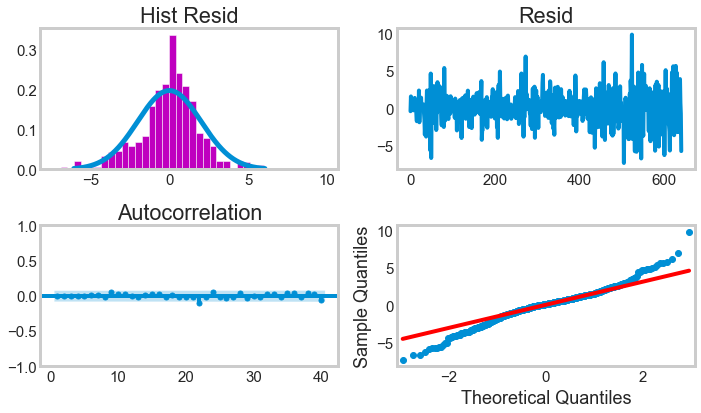

In [73]:
resid_GOOG = ARMA_GOOG.resid
plot_diagnosticsTight3(resid_GOOG)

In [74]:
# predcit on the train set
prediction = ARMA_GOOG.predict(n_periods=70, return_conf_int=True)

train_GOOG_ARIMA = pd.DataFrame(GOOG['Close'][:training_data_len])
train_GOOG_ARIMA['predict_diff'] = prediction
train_GOOG_ARIMA['predict_price'] = train_GOOG_ARIMA['Close'] + train_GOOG_ARIMA['predict_diff']
train_GOOG_ARIMA['predict_price'] = train_GOOG_ARIMA['predict_price'].shift(1)
train_GOOG_ARIMA = train_GOOG_ARIMA.dropna()

In [75]:
# RMSE of Train Set
GOOG_rmse = math.sqrt(mean_squared_error(train_GOOG_ARIMA['Close'], train_GOOG_ARIMA['predict_price']))
print('GOOG RMSE Train Set is',round(GOOG_rmse,3))

# predcit on the test set
GOOG_fc = ARMA_GOOG.forecast(70 , alpha = 0.05)

test_GOOG_ARIMA = pd.DataFrame(GOOG['Close'][training_data_len:])[:-1]
test_GOOG_ARIMA['predict_diff'] = GOOG_fc
test_GOOG_ARIMA['predict_price'] = test_GOOG_ARIMA['Close'] + test_GOOG_ARIMA['predict_diff']
test_GOOG_ARIMA['predict_price'] = test_GOOG_ARIMA['predict_price'].shift(1)
test_GOOG_ARIMA = test_GOOG_ARIMA.dropna()

GOOG RMSE Train Set is 2.01


In [76]:
# RMSE of Test Set
GOOG_rmse = math.sqrt(mean_squared_error(test_GOOG_ARIMA['Close'], test_GOOG_ARIMA['predict_price']))
print('GOOG RMSE Test Set  is',round(GOOG_rmse,3))

final_GOOG_ARIMA = pd.concat([train_GOOG_ARIMA, test_GOOG_ARIMA], axis=0)

GOOG RMSE Test Set  is 2.559


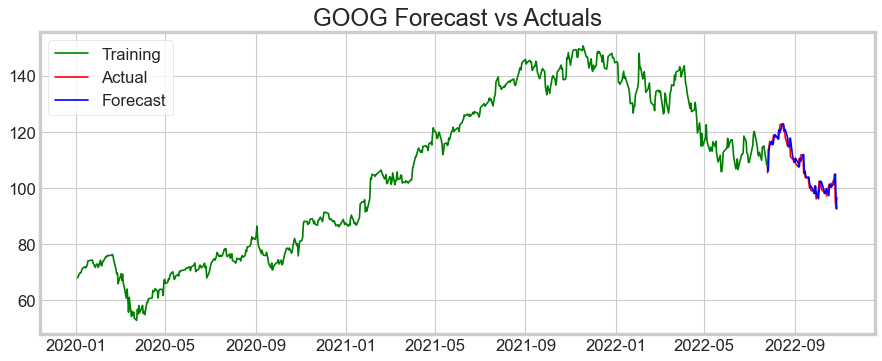

In [77]:
# Plot
plt.figure(figsize=(12,5), dpi=80)
plt.plot(final_GOOG_ARIMA['Close'][0:training_data_len], label='Training',color="green", linewidth=1.5)
plt.plot(final_GOOG_ARIMA['Close'][training_data_len:], label='Actual', color="red",linewidth=1.5)
plt.plot(final_GOOG_ARIMA['predict_price'][training_data_len:], label='Forecast', color="blue",linewidth=1.5)
plt.title('GOOG Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=15)
plt.show()

## Let's then work with the log(price) difference on GOOG

In [78]:
# Separate Train test data 
GOOG_pr_log_diff_train_data = GOOG_pr_log_diff[0:training_data_len]
GOOG_pr_log_diff_test_data  = GOOG_pr_log_diff[training_data_len:]

In [79]:
GOOG_log_aic= arimamodel_aic(GOOG_pr_log_diff_train_data)
GOOG_log_aic.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3136.117, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3151.102, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-3153.168, Time=0.10 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-3151.737, Time=0.07 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-3149.790, Time=0.12 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=-3149.242, Time=0.31 sec
 ARIMA(0,0,6)(0,0,0)[0]             : AIC=-3149.047, Time=0.37 sec
 ARIMA(0,0,7)(0,0,0)[0]             : AIC=-3155.902, Time=0.57 sec
 ARIMA(0,0,8)(0,0,0)[0]             : AIC=-3157.590, Time=0.70 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3153.502, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3153.182, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3151.587, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-3149.720, Time=0.13 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-3150.326, Time=0.25 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=-3152.062, Time=0.40

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  643
Model:               SARIMAX(7, 0, 1)   Log Likelihood                1594.052
Date:                Thu, 08 Dec 2022   AIC                          -3170.104
Time:                        18:24:13   BIC                          -3129.909
Sample:                             0   HQIC                         -3154.506
                                - 643                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6749      0.160     -4.214      0.000      -0.989      -0.361
ar.L2         -0.0304      0.045     -0.671      0.503      -0.119       0.058
ar.L3          0.0221      0.039      0.563      0.574      -0.055       0.099
ar.L4         -0.0243      0.043     -0.567      0.571      -0.108       0.060
ar.L5         -0.0336      0.042     -0.799      0.425      -0.116       0.049
ar.L6         -0.1061      0.042     -2.533      0.011      -0.188      -0.024
ar.L7          0.0800      0.050      1.609      0.108      -0.017       0.178
ma.L1          0.5462      0.164      3.335      0.001       0.225       0.867
sigma2         0.0004   1.77e-05     23.246      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               134.92
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.26
Prob(H) (two-sided):                  0.13   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
GOOG_log_bic= arimamodel_bic(GOOG_pr_log_diff_train_data)
GOOG_log_bic.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-3131.650, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=-3142.170, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : BIC=-3139.769, Time=0.10 sec
 ARIMA(0,0,3)(0,0,0)[0]             : BIC=-3133.873, Time=0.07 sec
 ARIMA(0,0,4)(0,0,0)[0]             : BIC=-3127.459, Time=0.12 sec
 ARIMA(0,0,5)(0,0,0)[0]             : BIC=-3122.445, Time=0.31 sec
 ARIMA(0,0,6)(0,0,0)[0]             : BIC=-3117.784, Time=0.37 sec
 ARIMA(0,0,7)(0,0,0)[0]             : BIC=-3120.173, Time=0.57 sec
 ARIMA(0,0,8)(0,0,0)[0]             : BIC=-3117.395, Time=0.69 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=-3144.570, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=-3139.784, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : BIC=-3133.723, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : BIC=-3127.389, Time=0.13 sec
 ARIMA(1,0,4)(0,0,0)[0]             : BIC=-3123.529, Time=0.25 sec
 ARIMA(1,0,5)(0,0,0)[0]             : BIC=-3120.799, Time=0.40

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  643
Model:               SARIMAX(1, 0, 0)   Log Likelihood                1578.751
Date:                Thu, 08 Dec 2022   AIC                          -3153.502
Time:                        18:24:35   BIC                          -3144.570
Sample:                             0   HQIC                         -3150.036
                                - 643                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1735      0.027     -6.525      0.000      -0.226      -0.121
sigma2         0.0004   1.62e-05     26.685      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               201.55
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.23
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
model_ARMA_GOOG_log = ARIMA(GOOG_pr_log_diff_train_data, order=(7,0,1))
ARMA_GOOG_log = model_ARMA_GOOG_log.fit()
print(ARMA_GOOG_log.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  643
Model:                 ARIMA(7, 0, 1)   Log Likelihood                1594.511
Date:                Thu, 08 Dec 2022   AIC                          -3169.022
Time:                        18:24:37   BIC                          -3124.360
Sample:                             0   HQIC                         -3151.690
                                - 643                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.993      0.321      -0.001       0.002
ar.L1         -0.6726      0.157     -4.295      0.000      -0.979      -0.366
ar.L2         -0.0426      0.046     -0.924      0.3

C:\Users\andy2\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


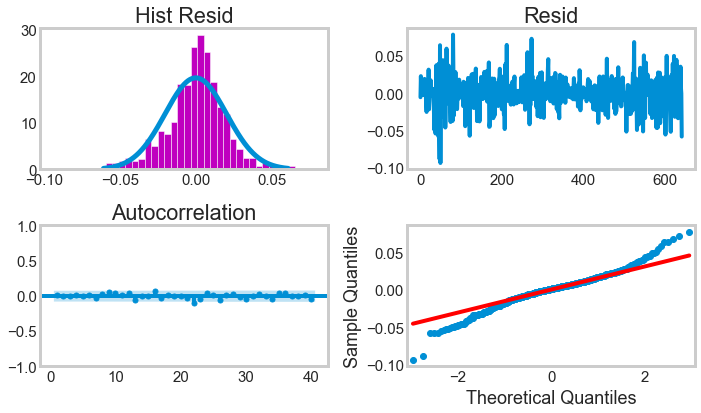

In [82]:
resid_GOOG_log = ARMA_GOOG_log.resid
plot_diagnosticsTight3(resid_GOOG_log)

In [83]:
# predcit on the train set
prediction_GOOG_log = ARMA_GOOG_log.predict(n_periods=70, return_conf_int=True)

# RMSE of Train Set
GOOG_rmse_log = math.sqrt(mean_squared_error(GOOG_pr_log_diff_train_data, prediction_GOOG_log))
print('AAPL Log RMSE Train Set is',round(GOOG_rmse_log,3))

AAPL Log RMSE Train Set is 0.02


In [84]:
# predcit on the test set
fc_GOOG_log = ARMA_GOOG_log.forecast(70 , alpha = 0.05)

# RMSE of Test Set
GOOG_rmse_log = math.sqrt(mean_squared_error(GOOG_pr_log_diff_test_data, fc_GOOG_log))
print('AAPL Log RMSE Test Set is',round(GOOG_rmse_log,3))

AAPL Log RMSE Test Set is 0.025
